# OVERVIEW

In this lab, you will perform a supervised text regression task. The data for the task will consist of student essays from The William and Flora Hewlett Foundation. The dataset was created to assist in the design of solutions for automated grading of student-written essays. You will use a subset of this dataset and predict the scores of the essays. You may not use external data to make predictions. 

You will be provided with two compressed folders: train.tsv and test.tsv. Both files contain the text of the essay and the score of each essay.



# PART 1: SETUP

### Q0: Run the following code! 
    
For reproducibility purposes, you will set the random seeds for NumPy and TensorFlow as 1234.  This way, all random steps will produce the same answers.


In [1]:
from numpy.random import seed

import tensorflow as tf

seed(1234)

tf.random.set_seed(seed = 1234)


ModuleNotFoundError: No module named 'tensorflow'

### Q1: Load the data
🎒<font color='red'>(1 point)</font>

We will use data from the [automated essay scoring task](https://www.kaggle.com/c/asap-aes) on Kaggle.

We will only use the training data, which we have provided for you -- you don't need to download anything from Kaggle.

Access the file `training_set_rel3.tsv` from Files -> Module 5 -> Lab_05_15_Text_Classification -> training_set_rel3.tsv

Please load the data from the current directory so that we can run your notebook unmodified.  

Use the pandas function `read_csv`, with the parameter `sep=\t` because this is a tab-separated value file (tsv). 

The columns are described on the [Kaggle site](https://www.kaggle.com/competitions/asap-aes/data)

We will use three columns: `essay`, `essay_set`, and `domain1_score`.

Create a new dataframe with only these three columns, and rename `domain1_score` to just `score`.

Display this dataframe.

In [39]:
import pandas as pd

#imoprt dataset
data = pd.read_csv('training_set_rel3.tsv', sep = '\t')

#subset dataset
training_df = data[["essay", "essay_set", "domain1_score"]]

#rename domain score column
training_df = training_df.rename(columns={'domain1_score': 'score'})

print(training_df)

                                                   essay  essay_set  score
0      Dear local newspaper, I think effects computer...          1      8
1      Dear @CAPS1 @CAPS2, I believe that using compu...          1      9
2      Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...          1      7
3      Dear Local Newspaper, @CAPS1 I have found that...          1     10
4      Dear @LOCATION1, I know having computers has a...          1      8
...                                                  ...        ...    ...
12971   In most stories mothers and daughters are eit...          8     35
12972   I never understood the meaning laughter is th...          8     32
12973  When you laugh, is @CAPS5 out of habit, or is ...          8     40
12974                                 Trippin' on fen...          8     40
12975   Many people believe that laughter can improve...          8     40

[12976 rows x 3 columns]


## Q2: Select the data from a single essay set
🎒<font color='red'>(1 point)</font>

There are 8 totally unrelated essay sets in this data.

Filter the data frame so we are only considering essay_set = 7

In [41]:
training_df = training_df.loc[training_df['essay_set'] == 7]

print(training_df)

                                                   essay  essay_set  score
10684  Patience is when your waiting .I was patience ...          7     15
10685  I am not a patience person, like I can’t sit i...          7     13
10686  One day I was at basketball practice and I was...          7     15
10687  I going to write about a time when I went to t...          7     17
10688  It can be very hard for somebody to be patient...          7     13
...                                                  ...        ...    ...
12248  One time I was getting a cool @CAPS1 game it w...          7     12
12249  A patent person in my life is my mom. Aicason ...          7     16
12250  A time when someone else I know was patient wa...          7     19
12251  I hate weddings. I love when people get marrie...          7     22
12252  A few weeks ago, we had a garage sale and a mo...          7     15

[1569 rows x 3 columns]


### Q3: Plot the distribution of scores
🎒<font color='red'>(3 points)</font>

Create a plot of a histogram of the scores in the training set.  Comment on what you see.  

One option is to use the [seaborn](https://seaborn.pydata.org/) histplot function.  If you use seaborn, you can use the parameter `bins` to set the bin locations if they look strange. The parameter accepts a list of explicit locations. If you want to center the bins on the tick marks, you cand do something like this:

    bins=np.arange(minv,maxv)-0.5
    
where minv and maxv are the mininmum and maximum value in the range, respectively.   This expression indicates the number of possible scores, and that the tick marks should be at the halfway mark of each bar.

You may use some other visualization library if you wish!   The goal is to inspect the distribution of scores.


### Q4: Create a test/train split
🎒<font color='red'>(1 point)</font>

Use the function [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).  Use the `test_size` parameter to control the size of the test set; use 0.2 to indicate a 20% split.

## Part 2: Conventional Representations

### Q5: Create vectors using term frequency
🎒<font color='red'>(3 points)</font>

Use the `CountVectorizer` class from sklearn to create a vector for each essay.  We can't use text directly with machine learning; we need to create a vector of numbers first.  The CountVectorizer creates a vector with one position for each word in the corpus with a value of the number of occurrences of that word in the essay.

The vectorizer works like a model in sklearn: call the fit method on the essay data to "train" a model on the training set.  In this situation, we aren't really training anything, but we need a corpus to define the vectors -- only the words in the corpus we use will be represented in the vector.  

The fit method returns the trained model.  Now we can use the `transform` method to convert any text into a vector.

Call the transform method on the training essays and the test essays to create variables `xtrain` and `ytrain`.


Report the number of dimensions for each vector; i.e., the number of terms in the corpus. 


9529

### Q6: Train a regression model using your vectors
🎒<font color='red'>(2 point)</font>

Now that we have vectors, we can train a regression model to predict the essay score.

Use a [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) model.

Call the fit method on your training data xtrain and ytrain.

Then call the score method on your test data xtest and ytest.  The score method provides a default evaluation metric.  For the Ridge model, the score method returns $R^2$ which is called the coefficient of determination.  It tells you the proportion of the variation in the essay score is predictable from the essay text: higher is better.

Report the coefficient of determination.

0.20398635634925988

### Q7: Plot the distribution of scores 
🎒<font color='red'>(2 points)</font>

Plot a histogram of your predicted scores.

Plot another histogram of the ground truth scores, superimposed on the first (using seaborn, just call the function again.)

How is your model's distribution of scores different from the ground truth distribution?  Describe how they differ; what kind of mistakes is your model making?

<AxesSubplot:ylabel='Count'>

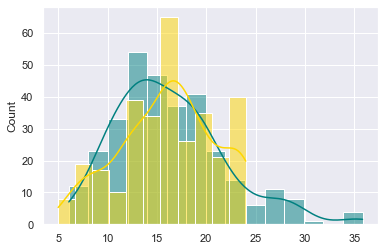

Describe the differences here...

### Q8: Train a new model using TF-IDF instead of term frequencies
🎒<font color='red'>(1 points)</font>

Repeat the last two steps but use the `TfidfVectorizer` class instead of the `CountVectorizer` class.  TF-IDF stands for Term Frequency Inverse Document Frequency: this class creates a vector with one position for each word in the corpus with a value of the number of occurrences of that word in the essay (term frequency) divided by (i.e., normalized by) the number of documents in which that term appears (inverse document frequency).  (Why do we normalize by document frequency?)

You can pass in a set of stopwords to prevent those words from being used as part of the corpus.   The library nltk includes a set of stopwords.

Report the score of a Ridge model trained using these vectors.  Does the performance improve?  Why?

0.571454179158216

### Q9: Plot the distribution of scores
🎒<font color='red'>(1 point)</font>

Plot a histogram of your predicted scores from your new model.

Plot another histogram of the ground truth scores.

How is your new model's distribution of scores different from the ground truth distribution? Is it doing better than your first model?  How is it doing better?

<AxesSubplot:ylabel='Count'>

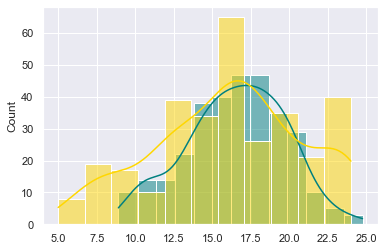

### Q10: Try to improve on your model
🎒<font color='red'>(5 points)</font>

Try to find a model that produces a better score.  Some ideas to consider:

* Use the `tokenizer` parameter to provide a custom [stemmer/lemmatizer](https://www.nltk.org/howto/stem.html). Use can use one of the lemmatizers from the nltk library.
* Use the `ngram_range` parameter of the vectorizer to consider bi-grams (two-term combinations) or tri-grams (three term combinations)
* Use the `stopwords` parameter to customize the set of words to ignore when using the corpus.  The library nltk includes a set of stopwords in the corpus module. 
* Use the `alpha` parameter of the Ridge model to change the strength of regularization.
* Use a different linear model, e.g., [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)

Report the score (and make sure the score is still $R^2$ so it can be compared with your previous score.

Once again, include a plot of the histogram of scores to get a sense of what kind of mistakes your model is making.

## Part 3: Neural Network Representations


For this part, we will implement a deep sentence embedder to replace the feature selection process. As a first step, choose your best-performing model from Part 2.

This time, you will obtain vectors by using a pre-trained neural network model called the Universal Sentence Encoder.  This model will produce a dense vector from any sequence of text.  (What do I mean by dense?)

First, import the model with the following code.  This step will take considerable time -- it is downloading a large pre-trained model for the first time.


In [236]:
import tensorflow_hub as hub

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"

model = hub.load(module_url)

### Q11: Generate embeddings
🎒<font color='red'>(1 point)</font>

Next, you will embed the data with the imported model. The Universal Sentence Encoder takes a list of strings and generates an embedding (i.e., a vector) for each string. 

You can call the model you downloaded like a function. 

Generate a vector for each string in the training set; call this array xtrain.

Also generate a vector for each string in the test set; call this array xtest.

Notice how long this step takes -- it's a big model.

### Q12: Train and evaluate a regression model to predict scores using learned embeddings
🎒<font color='red'>(1 point)</font>

Now retrain your regression model on these learned embeddings instead of the tfidf vectors.

Use the vanilla Ridge model.  Report the score. 

Which model appears to perform the best?

0.6876467970719029

### Q13: Plot the distribution of scores
🎒<font color='red'>(1 point)</font>


Once again, plot a histogram of your predicted scores from your new model.

Plot another histogram of the ground truth scores.

How is your new model's distribution of scores different from the ground truth distribution? Is it doing better than your earlier models?  How is it doing better?


<AxesSubplot:ylabel='Count'>

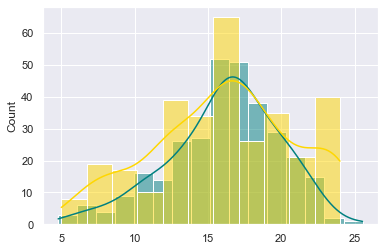

### Q14: Plot the errors
🎒<font color='red'>(1 point)</font>

We will analyze the difference between the neural model and your best conventional model.

Plot the distribution of errors -- see where the two models made mistakes.

The errors are your model's predicted score minus the ground truth human score.

Plot a boxplot of the errors for your model using the universal sentence encoder.  Use the seaborn histplot function. 

x will be the ground truth scores and y is the difference between ground truth and your predictions.  

What do you see?  Where does the model tend to make mistakes?

<AxesSubplot:>

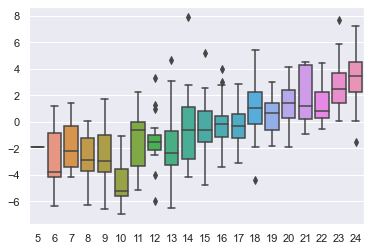

### Q15: Compare models directly
🎒<font color='red'>(1 point)</font>

Plot a histogram of the difference between your neural model and the ground truth.

Plot another histogram of the difference between your best conventional model and the ground truth.


Does either model tend to overestimate or underestimate the true score?

<AxesSubplot:ylabel='Count'>

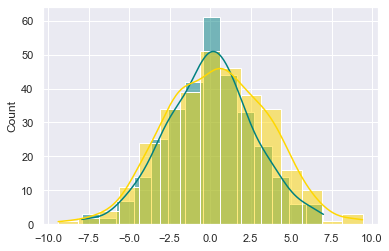

Answer the questions here

### Q14: Summarize your findings
🎒<font color='red'>(5 points)</font>

Summarize your results. Which approach worked best?  Why?  Does automatic essay scoring appear feasible?  What are some risks or ethical issues with automating this process?   How might we improve on this model?

Go back to the beginning and select a different essay set (2, 3, 8).  Re-run your entire notebook.  Do your conclusions change?  Do the models still work well for all essay sets?
